In [2]:
%matplotlib widget
import jungfrau_utils as ju
import numpy as np
import json, h5py, copy
import os, glob
import time
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from ipyfilechooser import FileChooser
from scipy.stats.stats import pearsonr

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *

import warnings
warnings.filterwarnings('ignore')

## choose file either with the run number (first cell) or widget (second cell)

In [8]:
pgroup='p20537'
runnumber = 157
print ('run: {:04d}'.format(runnumber))

#############################################################
jsonfile = ''
jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runnumber))[0]
jsonfile

run: 0157


'/sf/alvra/data/p20537/raw/run0157-FePhen_RXES_2ps_loop_001/meta/scan.json'

In [2]:
fc = FileChooser('/sf/alvra/data/p20537/raw')  #this is for RC
fc.use_dir_icons = True

display(fc)

FileChooser(path='/sf/alvra/data/p20537/raw', filename='', title='HTML(value='', layout=Layout(display='none')…

In [ ]:
jsonfile = copy.copy(fc.selected)
jsonfile

In [9]:
quantile_corr = 0.2

detector_XAS = channel_diode_1
detector_Izero = channel_Izero110

#######################################################################################################33
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
scan = remove_JF_from_scan(scan)

(DataDiode_pump, DataDiode_unpump, Pump_probe_Diode,
 Izero_pump_scan, Izero_unpump_scan, correlation, Energy_eV, goodshots) = \
XAS_scan_1diode(scan, detector_XAS, detector_Izero, quantile_corr)



Processing: run0157-FePhen_RXES_2ps_loop_001
Step 121 of 121: Processing acq0121

--------------------------------------------------------------------------------

SAR-CVME-TIFALL5:EvtSet   1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS110:INTENSITY  996 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 996 / 1001 -> 0% loss
complete channels: 2 / 3 -> 33% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 50.0 Hz (delayed or dark)
Pump scheme is 1:1
Loaded 495 pump and 495 unpump shots
(22,) shots out of (495,) survived
Step 121 of 121: Processed acq0121
correlation Diode (all shots) = 0.9971630626722102


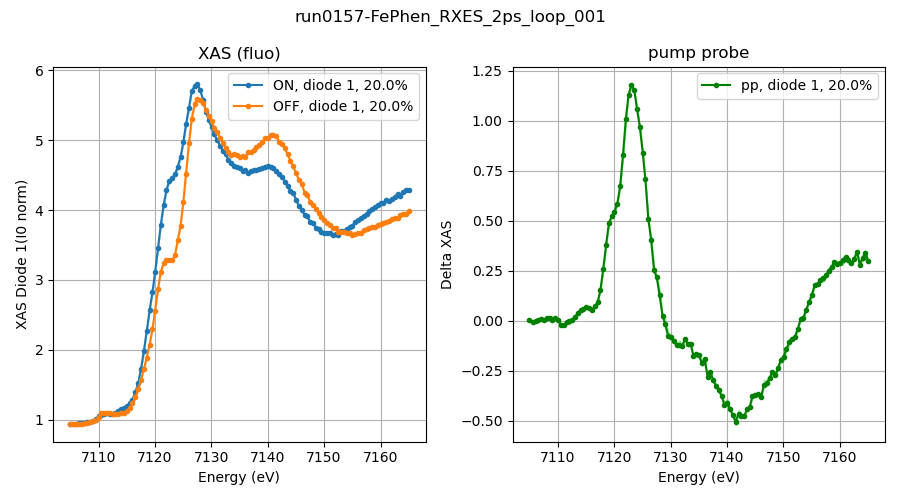

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(jsonfile.split('/')[-3], fontsize = 12)

XAS_pump = DataDiode_pump[:,0]
err_low_pump = DataDiode_pump[:,1]
err_high_pump = DataDiode_pump[:,2]
XAS_unpump = DataDiode_unpump[:,0]
err_low_unpump = DataDiode_unpump[:,1]
err_high_unpump = DataDiode_unpump[:,2]
XAS_pump_probe = Pump_probe_Diode[:,0]
err_low_pump_probe = Pump_probe_Diode[:,1]
err_high_pump_probe = Pump_probe_Diode[:,2]

ax1.plot(Energy_eV, XAS_pump, label='ON, diode 1, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err_low_pump, err_high_pump, color='lightblue')

ax1.plot(Energy_eV, XAS_unpump, label='OFF, diode 1, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err_low_unpump, err_high_unpump, color='navajowhite')

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("XAS Diode 1(I0 norm)")
ax1.set_title('XAS (fluo)')
ax1.legend(loc="best")
ax1.grid()

ax2.plot(Energy_eV, XAS_pump_probe, label='pp, diode 1, {}%'.format(quantile_corr*100),marker='.', color = 'g')
ax2.fill_between(Energy_eV, err_low_pump_probe, err_high_pump_probe, color='lightgreen')

ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel ("Delta XAS")
ax2.set_title('pump probe')
ax2.legend(loc="best")
ax2.grid()

plt.tight_layout()
plt.show()

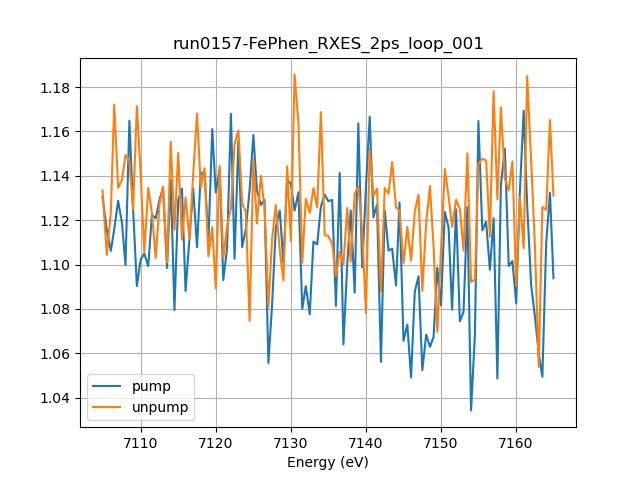

In [11]:
plt.figure()
plt.title(jsonfile.split('/')[-3])
#plt.plot(Energy_eV, correlation)
plt.plot(Energy_eV, Izero_pump_scan, label = 'pump')
plt.plot(Energy_eV, Izero_unpump_scan, label = 'unpump')
plt.legend(loc='best')
plt.xlabel('Energy (eV)')
#plt.ylabel('Correlation')
plt.grid()
plt.show()

## Check correlation for a certain energy point

In [13]:
chosen_energy = 7128

detector_XAS = channel_diode_1
detector_Izero = channel_Izero110

quantile_corr = 0.6
##################################################################3
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
scan = remove_JF_from_scan(scan)

index_energy = np.arange(len(Energy_eV))[(Energy_eV > chosen_energy)][0]

(Fluo_pump, Fluo_unpump, Izero_pump, Izero_unpump, 
 Fluo_pump_filter, Fluo_unpump_filter, Izero_pump_filter, Izero_unpump_filter) = \
Get_correlation_from_scan(scan, index_energy, detector_XAS, detector_Izero, quantile_corr)

print ('Energy = {} eV'.format(Energy_eV[index_energy]))

(188,) shots out of (494,) survived
Energy = 7128.021191276431 eV


(188,) shots out of (494,) survived


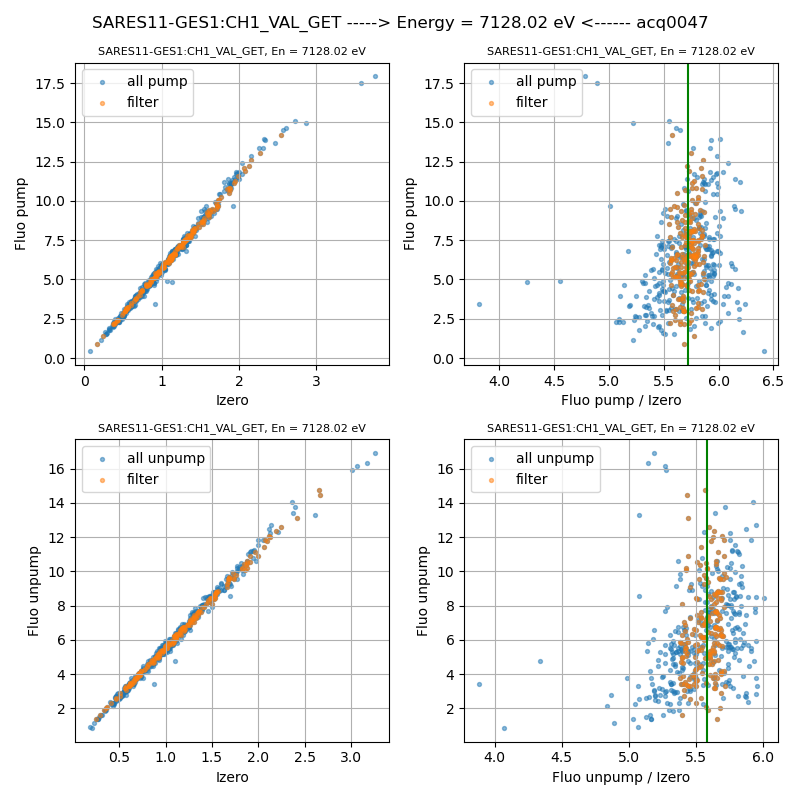

In [14]:
chosen_energy = 7128

detector_XAS = channel_diode_1
detector_Izero = channel_Izero110

quantile_corr = 0.6
##################################################################3
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
scan = remove_JF_from_scan(scan)

index_energy = np.arange(len(Energy_eV))[(Energy_eV > chosen_energy)][0]

(Fluo_pump, Fluo_unpump, Izero_pump, Izero_unpump, 
 Fluo_pump_filter, Fluo_unpump_filter, Izero_pump_filter, Izero_unpump_filter) = \
Get_correlation_from_scan(scan, index_energy, detector_XAS, detector_Izero, quantile_corr)

#print ('Correlation (all shots)      = {}'.format(pearsonr(Izero_pump,Fluo_pump)[0]))
#print ('Correlation (filtered shots) = {}'.format(pearsonr(Izero_pump_filter,Fluo_pump_filter)[0]))

#print ('Energy = {} eV'.format(Energy_eV[index_energy]))

fig,ax = plt.subplots(2,2,figsize=(8,8))
plt.suptitle('{} -----> Energy = {:.2f} eV <------ {}'.format(detector_XAS,Energy_eV[index_energy], scan.files[index_energy][1].split('/')[-1].split('.')[0]))


ax[0][0].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[0][0].scatter(Izero_pump, Fluo_pump, s=8, alpha = 0.5,  label = 'all pump')
ax[0][0].scatter(Izero_pump_filter, Fluo_pump_filter, s=8, alpha = 0.5, label='filter')
ax[0][0].legend(loc='best')
ax[0][0].set_xlabel('Izero')
ax[0][0].set_ylabel('Fluo pump')
ax[0][0].grid()

m_median_filter = np.median(Fluo_pump_filter/Izero_pump_filter)

ax[0][1].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[0][1].scatter(Fluo_pump/Izero_pump, Fluo_pump, s=8, alpha = 0.5,  label = 'all pump')
ax[0][1].scatter(Fluo_pump_filter/Izero_pump_filter, Fluo_pump_filter, s=8, alpha = 0.5, label='filter')
ax[0][1].legend(loc='best')
ax[0][1].set_xlabel('Fluo pump / Izero')
ax[0][1].set_ylabel('Fluo pump')
ax[0][1].axvline(x=m_median_filter, color = 'green')
ax[0][1].grid()

ax[1][0].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[1][0].scatter(Izero_unpump, Fluo_unpump, s=8, alpha = 0.5,  label = 'all unpump')
ax[1][0].scatter(Izero_unpump_filter, Fluo_unpump_filter, s=8, alpha = 0.5, label='filter')
ax[1][0].legend(loc='best')
ax[1][0].set_xlabel('Izero')
ax[1][0].set_ylabel('Fluo unpump')
ax[1][0].grid()

m_median_filter = np.median(Fluo_unpump_filter/Izero_unpump_filter)

ax[1][1].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[1][1].scatter(Fluo_unpump/Izero_unpump, Fluo_unpump, s=8, alpha = 0.5,  label = 'all unpump')
ax[1][1].scatter(Fluo_unpump_filter/Izero_unpump_filter, Fluo_unpump_filter, s=8, alpha = 0.5, label='filter')
ax[1][1].legend(loc='best')
ax[1][1].set_xlabel('Fluo unpump / Izero')
ax[1][1].set_ylabel('Fluo unpump')
ax[1][1].axvline(x=m_median_filter, color = 'green')
ax[1][1].grid()


plt.tight_layout()

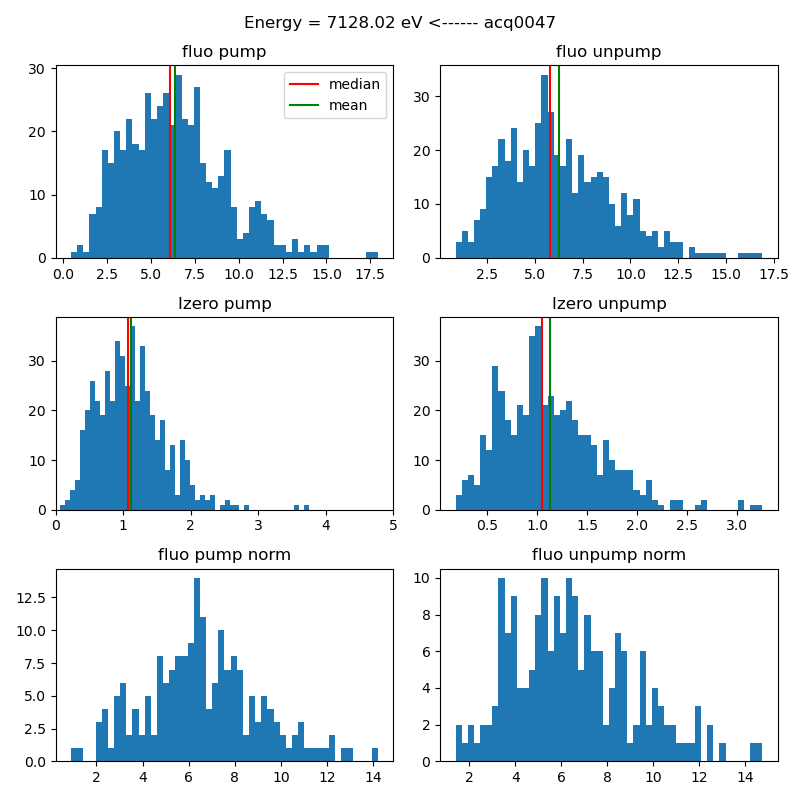

In [15]:
plt.figure(figsize=(8,8))
plt.suptitle('Energy = {:.2f} eV <------ {}'.format(Energy_eV[index_energy], scan.files[index_energy][1].split('/')[-1].split('.')[0]))

plt.subplot(321)
plt.title('fluo pump')
plt.hist(Fluo_pump, bins = 50)
plt.axvline(x=np.median(Fluo_pump), color ='r',label='median')
plt.axvline(x=np.mean(Fluo_pump), color ='g', label = 'mean')
plt.legend(loc='best')

plt.subplot(322)
plt.title('fluo unpump')
plt.hist(Fluo_unpump, bins = 50)
plt.axvline(x=np.median(Fluo_unpump), color ='r')
plt.axvline(x=np.mean(Fluo_unpump), color ='g')

plt.subplot(323)
plt.title('Izero pump')
plt.hist(Izero_pump, bins = 50)
plt.axvline(x=np.median(Izero_pump), color ='r')
plt.axvline(x=np.mean(Izero_pump), color ='g')
plt.xlim(0,5)

plt.subplot(324)
plt.title('Izero unpump')
plt.hist(Izero_unpump, bins = 50)
plt.axvline(x=np.median(Izero_unpump), color ='r')
plt.axvline(x=np.mean(Izero_unpump), color ='g')

plt.subplot(325)
plt.title('fluo pump norm')
plt.hist(Fluo_pump_filter, bins = 50)
#plt.axvline(x=qnt_low_pump, color = 'black')
#plt.axvline(x=qnt_high_pump, color = 'black')
#plt.xlim(0,10)

plt.subplot(326)
plt.title('fluo unpump norm')
plt.hist(Fluo_unpump_filter, bins = 50)
#plt.axvline(x=qnt_low_pump, color = 'black')
#plt.axvline(x=qnt_high_pump, color = 'black')
#plt.xlim(0,10)


plt.tight_layout()
plt.show()

## Load files in a loop

In [59]:
datafiles = []
for file in glob.glob('/sf/alvra/data/p20537/raw/*FePhen_RXES_250fs*/meta/scan.json'):
    datafiles.append(file)
datafiles = sorted(datafiles, key = os.path.getmtime)
patch1 = datafiles[:1]
patch2 = datafiles[2:11]
patch = [*patch1, *patch2]
patch

['/sf/alvra/data/p20537/raw/run0176-FePhen_RXES_250fs/meta/scan.json',
 '/sf/alvra/data/p20537/raw/run0178-FePhen_RXES_250fs_002/meta/scan.json',
 '/sf/alvra/data/p20537/raw/run0179-FePhen_RXES_250fs_003/meta/scan.json',
 '/sf/alvra/data/p20537/raw/run0180-FePhen_RXES_250fs_004/meta/scan.json',
 '/sf/alvra/data/p20537/raw/run0181-FePhen_RXES_250fs_005/meta/scan.json',
 '/sf/alvra/data/p20537/raw/run0182-FePhen_RXES_250fs_006/meta/scan.json',
 '/sf/alvra/data/p20537/raw/run0183-FePhen_RXES_250fs_007/meta/scan.json',
 '/sf/alvra/data/p20537/raw/run0184-FePhen_RXES_250fs_008/meta/scan.json',
 '/sf/alvra/data/p20537/raw/run0185-FePhen_RXES_250fs_009/meta/scan.json',
 '/sf/alvra/data/p20537/raw/run0186-FePhen_RXES_250fs_010/meta/scan.json']

In [60]:
quantile_corr = 0.4

detector_XAS = channel_diode_1
detector_Izero = channel_Izero110

#######################################################################################################33
from sfdata import SFScanInfo

DataDiode_pump_all = []
DataDiode_unpump_all = []
Pump_probe_all = []

for json_file in patch:
    scan = SFScanInfo(json_file)
    scan = remove_JF_from_scan(scan)
    # Energy_eV = scan.readbacks
    
    DataDiode_pump = []
    DataDiode_unpump = []
    Pump_probe_Diode = []
    
    try:
        (DataDiode_pump, DataDiode_unpump, Pump_probe_Diode,
         Izero_pump_scan, Izero_unpump_scan, correlation, Energy_eV, goodshots) = \
        XAS_scan_1diode(scan, detector_XAS, detector_Izero, quantile_corr)
    except ValueError:
        continue

    # (DataDiode_pump, DataDiode_unpump, Pump_probe_Diode, _, _, _, Energy_eV) = \
    #     XAS_scan_1diode(json_file, detector_XAS, detector_Izero, quantile_corr)        
        
    DataDiode_pump_all.append(DataDiode_pump)
    DataDiode_unpump_all.append(DataDiode_unpump)
    Pump_probe_all.append(Pump_probe_Diode)    

DataDiode_pump_all = np.array(DataDiode_pump_all)
DataDiode_unpump_all = np.array(DataDiode_unpump_all)
Pump_probe_all = np.array(Pump_probe_all)


Processing: run0186-FePhen_RXES_250fs_010
Step 121 of 121: Processing acq0121

--------------------------------------------------------------------------------

SAR-CVME-TIFALL5:EvtSet   1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS110:INTENSITY  998 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 998 / 1001 -> 0% loss
complete channels: 2 / 3 -> 33% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 50.0 Hz (delayed or dark)
Pump scheme is 1:1
Loaded 497 pump and 497 unpump shots
(68,) shots out of (497,) survived
Step 121 of 121: Processed acq0121
correlation Diode (all shots) = 0.9956555741074323


In [72]:
def binned(x,n):
    f = np.divmod(len(x), n)[0]
    ret = np.zeros(f)
    for i in range(n):
        ret += x[i:n*f:n]
    return ret/n

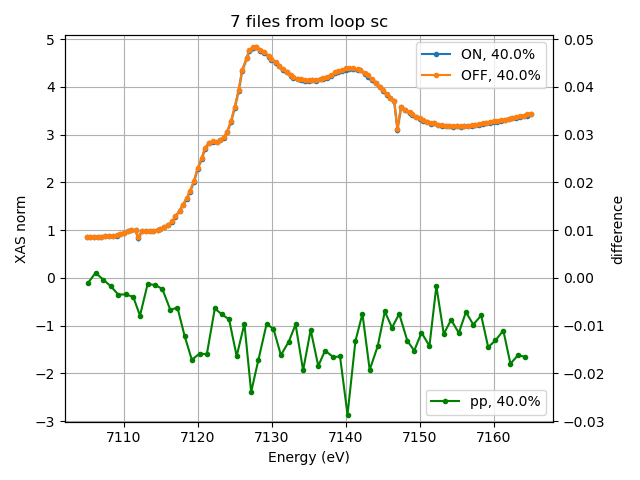

In [81]:
nscans = 7

XAS_pump = np.mean(DataDiode_pump_all[:nscans], axis=0)[:,0]
err_low_pump = np.mean(DataDiode_pump_all[:nscans], axis=0)[:,1]
err_high_pump = np.mean(DataDiode_pump_all[:nscans], axis=0)[:,2]
XAS_unpump = np.mean(DataDiode_unpump_all[:nscans], axis=0)[:,0]
err_low_unpump = np.mean(DataDiode_unpump_all[:nscans], axis=0)[:,1]
err_high_unpump = np.mean(DataDiode_unpump_all[:nscans], axis =0)[:,2]
XAS_pump_probe = np.mean(Pump_probe_all[:nscans], axis=0)[:,0]
err_low_pump_probe = np.mean(Pump_probe_all[:nscans], axis=0)[:,1]
err_high_pump_probe = np.mean(Pump_probe_all[:nscans], axis=0)[:,2]

fig, ax1 = plt.subplots()
# plt.title('{} files from loop {}'.format(len(patch), json_file.split('/')[-1][:-7]))
plt.title('{} files from loop {}'.format(nscans, json_file.split('/')[-1][:-7]))

ax2 = ax1.twinx()
ax1.plot(Energy_eV, XAS_pump, label='ON, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err_low_pump, err_high_pump, color='lightblue')

ax1.plot(Energy_eV, XAS_unpump, label='OFF, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err_low_unpump, err_high_unpump, color='navajowhite')

# ax2.plot(Energy_eV, XAS_pump_probe, label='pp, {}%'.format(quantile_corr*100),marker='.', color='g')
ax2.plot(binned(Energy_eV,2), binned(XAS_pump_probe,2), label='pp, {}%'.format(quantile_corr*100),marker='.', color='g')

ax1.legend(loc='best')
ax2.legend(loc='lower right')
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('XAS norm')
ax2.set_ylabel('difference')

ratio = 100
ylim1 = ax1.get_ylim()
ylim2 = ax2.get_ylim()
ax1.set_ylim(ylim2[0]*ratio, ylim1[1])
ax2.set_ylim(ylim2[0], ylim1[1]/ratio)

ax1.grid()
plt.tight_layout()
plt.show()

In [67]:
np.shape(DataDiode_pump_all)

(10, 121, 3)

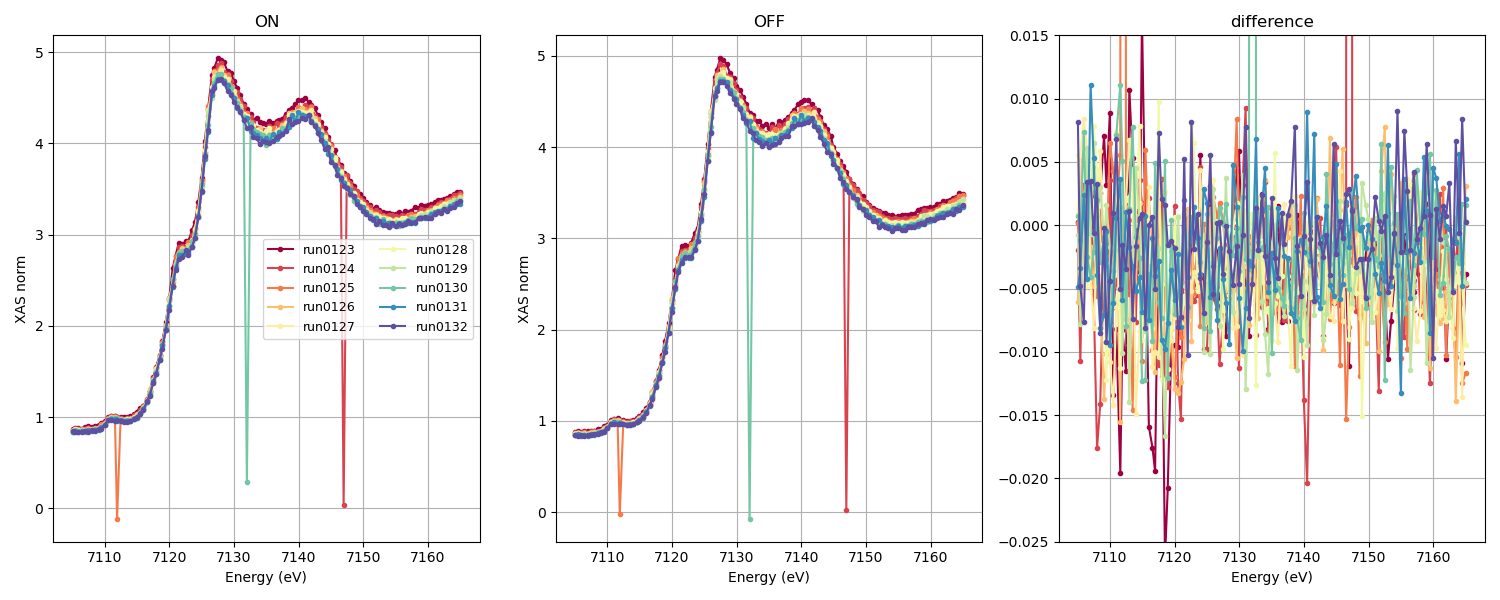

In [66]:
XAS_pump_all = DataDiode_pump_all[:,:,0]
XAS_unpump_all = DataDiode_unpump_all[:,:,0]
XAS_pump_probe_all = Pump_probe_all[:,:,0]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,6))
plt.title('{} files from loop {}'.format(len(patch), json_file.split('/')[-1][:-7]))

for ax in [ax1, ax2, ax3]:
    ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,10)))
    ax.set_xlabel('Energy (eV)')
    ax.grid()

for i in range(10):
    ax1.plot(Energy_eV, XAS_pump_all[i], label='run{:04d}'.format(123+i),marker='.')
    ax2.plot(Energy_eV, XAS_unpump_all[i], label='run{:04d}'.format(123+i),marker='.')
    ax3.plot(Energy_eV, XAS_pump_probe_all[i]/XAS_pump_all[i], label='pp, {}%'.format(quantile_corr*100),marker='.')

ax1.legend(loc='best', fontsize=9, ncol=2)
# ax2.legend(loc='lower right')

ax1.set_title('ON')
ax2.set_title('OFF')

ax1.set_ylabel('XAS norm')
ax2.set_ylabel('XAS norm')
ax3.set_title('difference')

ax3.set_ylim(-0.025,0.015)

plt.tight_layout()
plt.show()

In [34]:
# np.save('/das/work/p20/p20537/victoria/FePhen_RXES_2ps_loop1/DataDiode_pump_all.npy', DataDiode_pump_all)
# np.save('/das/work/p20/p20537/victoria/FePhen_RXES_2ps_loop1/DataDiode_unpump_all.npy', DataDiode_unpump_all)
# np.save('/das/work/p20/p20537/victoria/FePhen_RXES_2ps_loop1/Pump_probe_all.npy', Pump_probe_all)
# np.save('/das/work/p20/p20537/victoria/FePhen_RXES_2ps_loop1/Energy_eV.npy', Energy_eV)

In [42]:
DataDiode_pump_2ps_all = np.load('/das/work/p20/p20537/victoria/FePhen_RXES_2ps_loop1/DataDiode_pump_all.npy')
DataDiode_unpump_2ps_all = np.load('/das/work/p20/p20537/victoria/FePhen_RXES_2ps_loop1/DataDiode_unpump_all.npy')
Pump_probe_2ps_all = np.load('/das/work/p20/p20537/victoria/FePhen_RXES_2ps_loop1/Pump_probe_all.npy')
Energy_eV_2ps = np.load('/das/work/p20/p20537/victoria/FePhen_RXES_2ps_loop1/Energy_eV.npy')

## cell to export data

In [ ]:
import pandas as pd
DIR_save = "/das/work/p18/p18956/UserFolder/"
file2save = DIR_save + scan_name + ".txt"
pd.DataFrame({
    'Energy_eV' : Energy_eV,
    'pump_probe': Pump_probe,
    'signal_on' : DataFluo_pump,
    'signal_off' : DataFluo_unpump,
}).to_csv(file2save,index=False)